# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [535]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [536]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [537]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 66, 56]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,9,1534,7417,175,3468,27
2,4098,29892,26866,2616,17740,1340


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

* **Customer 0**: this customer uses most of its budget in fresh products, followed by Milk and Groceries. This leads to think this customer can be a restaurant, where lots of fresh food is necessary for cooking (meat, fish etc) as well as milk, for coffee and desserts. However there is a lot of money spent on Grocery as well what makes us think that it can also be a market rather than a restaurant, where most of the food they sell is fresh, as well as some groceries, and milk.

* **Customer 1**: this customer doesn't have a lot of spending in any of the categories. However it falls in the average for grocery shopping. This customer could be a convenience store, where people will mostly go to buy milk, and a few groceries, and some home supplies (when they can't be bothered to go to the big store).

* **Customer 2**: the last customer has a lot of spending on groceries, Milk, and Detergent_Paper. This could be a supermarket where usually a customer can find a wide range of products to get their weekly shopping done: from buying Milk, to buying detergent.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [538]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Because we don't have too many product categories
# we can loop through them all to compare the scores
scores = {}
for target_cat in data.columns.values:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy().drop([target_cat], axis=1)
    target_data = data[target_cat]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    seed = 2
    X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                        target_data,
                                                        test_size=0.25,
                                                        random_state=seed)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=seed)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores[target_cat] = score

print(scores)

{'Fresh': -0.5008898984351544, 'Milk': -0.15233126272668462, 'Grocery': 0.5143497802170307, 'Frozen': -5.126279086642156, 'Detergents_Paper': 0.537024600300491, 'Delicatessen': -2.181311763573109}


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

The feature I attempted to predict at first was *Fresh*, with an **R<sup>2</sup> score of -0.501.**

The result is negative, which in R<sup>2</sup> score terms means that the classifier performs worse than the simplest possible model (a horizontal line). This means that the category "Fresh" cannot be predicted from the other variables. Therefore "Fresh" is an important category because it is independent from all the other variables, which means we can get a lot of information from it resulting in an important featrue for identifying customer spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

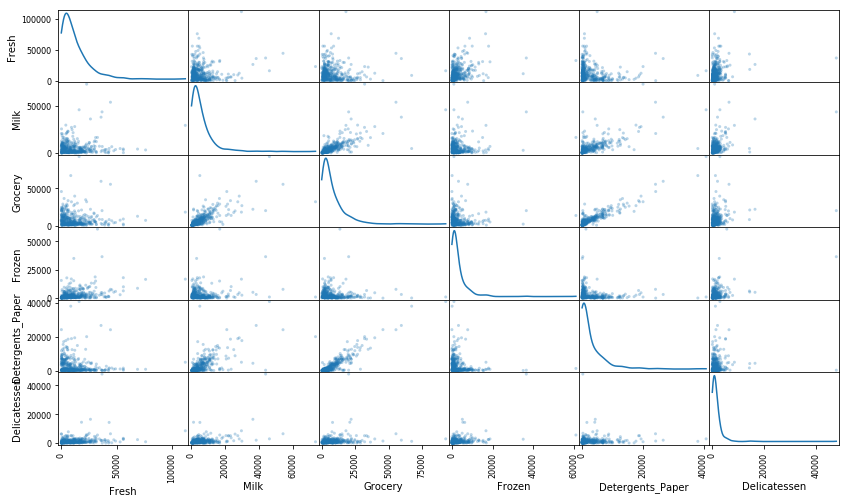

In [539]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

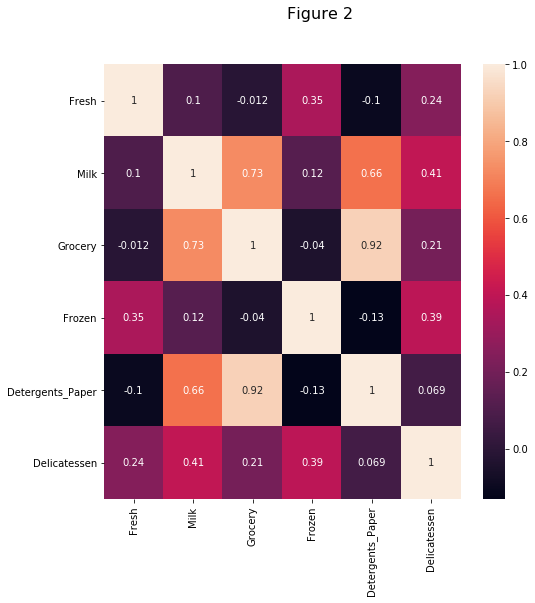

In [540]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(8,8))
fig.suptitle('Figure 2', fontsize=16)
sns.heatmap(data.corr(), annot=True, ax=axs)

/home/pablo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


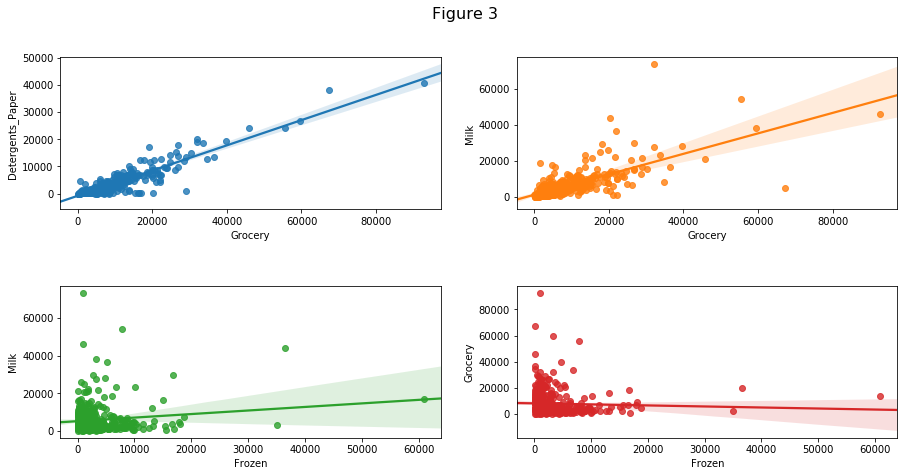

In [541]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,7))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Figure 3', fontsize=16)

sns.regplot(x="Grocery", y="Detergents_Paper", data=data, ax=axs[0][0])
sns.regplot(x="Grocery", y="Milk", data=data, ax=axs[0][1])

sns.regplot(x="Frozen", y="Milk", data=data, ax=axs[1][0])
sns.regplot(x="Frozen", y="Grocery", data=data, ax=axs[1][1])

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* For most pairs we can see that the data doesn't show any pattern of correlation, with a few exemptions, as we can observe in the top two plots of **figure 3**, where there is correlation. Also we can see that most values show skewness as most of the data concentrates near 0 values, with a lot of data points scattered towards further x and y axis. This skeweness can be observed in the bottom 2 plots of **figure 3**. Also by observing all the plots from figure 3 we can see that there are a lot of outliers present, that could compromise the clustering process.

* The features that obtained a high R2 score in the previous section tend to show correlation with 1 or more features, like Groceries or Detergents Paper. This means that they can easily be predicted from another variable, as we can see in the top 2 scatter plots from **figure 3**, where groceries can be somewhat predicted Detergents_Paper and Milk. The opposite happens for unpredictable (independent) features, which obtained a low score for the R2 score.

* The Feature I tried to predict from the other features was *Fresh*. As we can see in the correlation matrix, *Fresh* has a low correlation with most features, with a maximum of 0.24 with Delicatessen. This confirms that it is relevant variable, as it is not predictable from other variables, therefore being able to provide a lot of information.

* The distribution of the relevant features, for example Frozen, shows data distributed in a way that we can't make predictions or assumptions using other features, where no line can show a good trend for the data.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

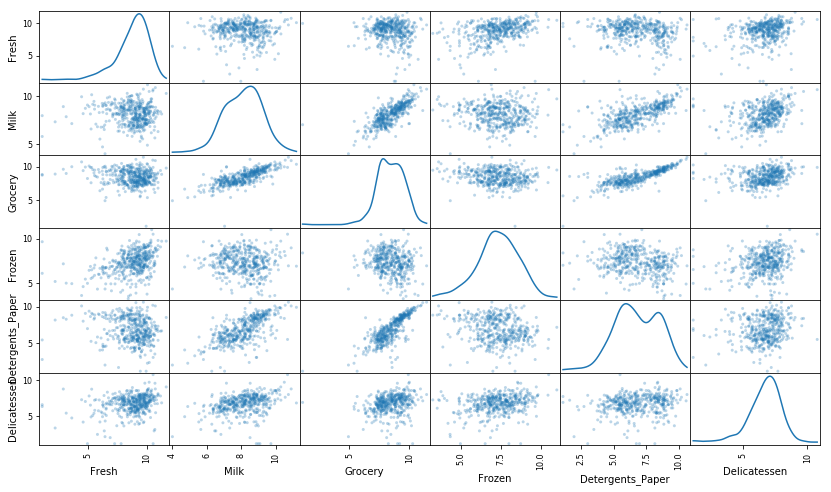

In [542]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [543]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
2,8.318254,10.305346,10.198617,7.869402,9.783577,7.200425


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [544]:
# list of indices of all the outliers
outliers_raw = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("min: {}, max: {}".format(Q1 - step, Q3 + step))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    indices = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    
    for index in indices:
        outliers_raw.append(index)

# Find the indices that don't have a duplicate
non_duplicate_indices = []

for i, x in enumerate(outliers_raw):
    ignore_i = outliers_raw[:i] + outliers_raw[i+1:]
    
    if x not in ignore_i:
        non_duplicate_indices.append(i)

# OPTIONAL: Select the indices for data points you wish to remove  
# Keep the outliers that are duplicate
outliers  = [outliers_raw[x] for x in non_duplicate_indices]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicatessen':
min: 3.5846472148919397, max: 11.962210381470092


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

**Hint:** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are some points considered outliers for more than one feature, for example the point with id 75, is considered an outlier in for *Grocery* and *Detergent_Paper*. The reason why this point can be found in both is because there is a *positive* correlation between *Grocery* and *Detergent_Paper*, where a high value in one will have a higher value in the other. Points like this can't be considered outliers as they follow a trend in the data, giving us useful information about correlation between variables. A point like this won't affect the classifier negatively as it follows the same pattern as all the other points. Other outliers that do not follow a pattern in the data with any other categories can mess up with the classifier, by  pulling the classifier towards them without giving any useful information for the classification.

I've removed all the outliers from the dataset that can be found in only one category. The reason why I've kept the duplicate outliers (the ones that appear in more than one category) is because their categories might hold some kind of correlation, therefore providing useful information for our clusuters.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

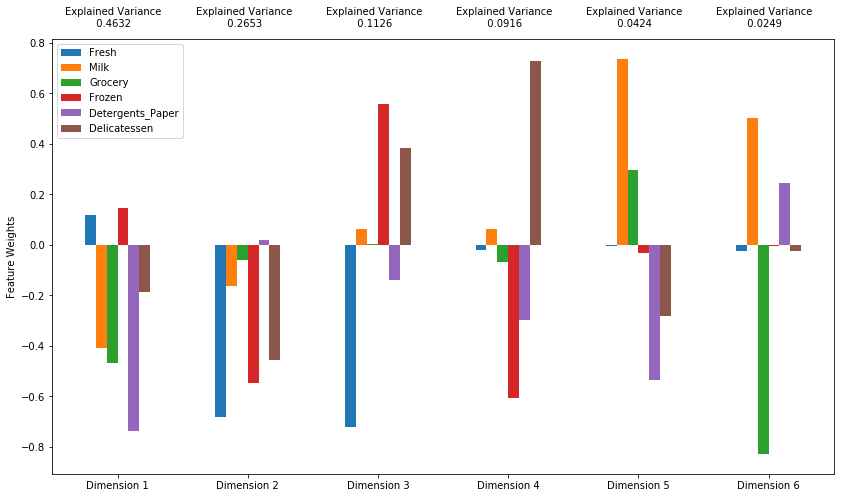

In [550]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained **in total** by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second component add up to a variance of **0.7285**, which is 72.85% of the total variance.

The first to the fourth components add up to a variance of **0.9327**, which is 93.27% of the total variance.

The plot above shows how much variance is explained for each category for each dimension. For the first principal component we can see that it is strongly correlated with a decrease of `Detergents_Paper`, followed by `Grocery`. We could interpret this as an increase in this dimension tranlates into a decrease of those categories. This suggests that those categories vary together, where a client with less expenses on `Detergents_Paper` will also have less expenses on `Grocery`, and `Milk`, this last feauture with a lesser correlation than the first two.

The second PC shows a strong correlation with a decrease on `Fresh`, `Frozen` and `Delicatessen`. Again, this shows a correlation of these categories in the second dimension, where a decrease in the expenses on of them will translate into a decrease of expenses in the others. A client who doesn't spend on `Fresh` won't spend on `Frozen`.

The third PC is interesting, as it shows both high values for both positive and negative weights. On the positive side we see that this dimension shows a correlation with `Frozen`, and in the negative side with `Fresh`. This suggests that clients who tend to spend more money on `Fresh` is correlated with spending less money in `Frozen`.

The fourth PC also shows an increase on both sides, with a high weight for `Delicatessen` on the positive side, and a high weight for `Frozen` in the negative side. This shows that a client who spends a lot in one will spend very low in the other. For example, the more a client spends on `Delicatessen`, the less it will spend on `Frozen`.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [551]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7299,0.2692,-1.4753,1.2475,0.2851,0.3619
1,-1.3319,7.3972,2.0006,-1.5407,-0.0738,-0.2151
2,-3.9482,-0.5482,0.5453,-0.8306,0.4101,0.3652


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [552]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [553]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7299,0.2692
1,-1.3319,7.3972
2,-3.9482,-0.5482


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

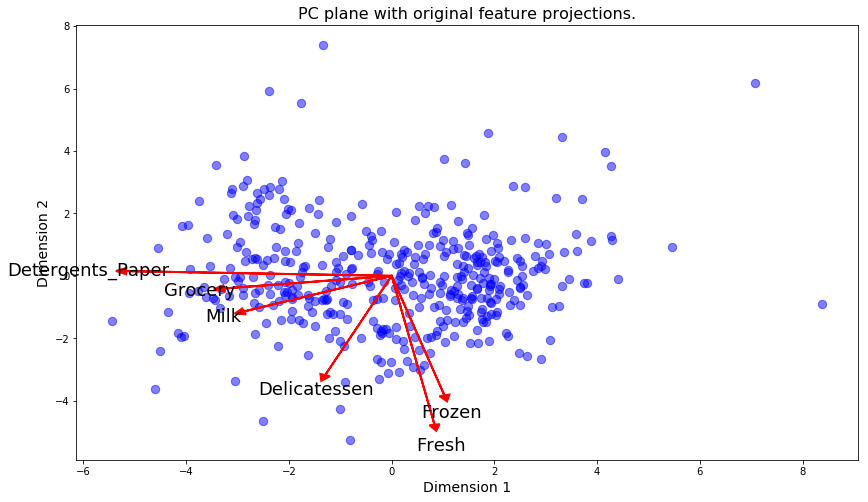

In [554]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

The first dimension agrees the most with `'Milk'`, `'Grocery'` and `'Detergents_Paper'` as they all move almost in the same direction. The second dimension agrees most with `Frozen` and `Fresh` 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Hint:** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* **K-means**: is a very efficient algorithm that works well on circular data, based on the nature of the squared distance error. A drawback is that when data is not circular it might not do a very good job. Also it is very important how the initial centroids are initialized, as this can decide how well the clusters are going to be towards the end. K-means will assing hard clusters, which means that each point will belong to only one cluster, which can lead to misclassified data.

* **Gaussian Mixture**: This can be used when the data is suspected to have a mix of gaussian distributions in it. Some of the advantages is that it is a soft clustering algorithm, which means that all points belong to all clusters with a higher or lower probability. Also, gaussian mixture has more flexibility when it comes to the shape of the data. Some drawbacks are that it has a slow convergence rate, and that it is possible to it converges at a local optimum.
* **What to choose**: Based on the distribution of the data I am going to choose the Gaussian Mixture clustering, as it looks like there are some possible normal distributions in the data. Also based on the shape of the distribution it looks like it will be more flexible 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [571]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

seed = np.random.seed(42)

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, n_init=10, random_state=seed).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

0.4257139789748019


Check how an increase of clusters affects the score

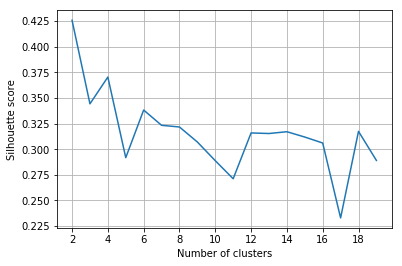

In [572]:
from matplotlib.ticker import MaxNLocator

scores = []

for i in range (2, 20):
    gmm = GaussianMixture(n_components=i, random_state=seed).fit(reduced_data)
    predictions = gmm.predict(reduced_data)

    score = silhouette_score(reduced_data, predictions)
    scores.append((i, score))

scores = pd.DataFrame(data=scores)

ax = sns.lineplot(x=0, y=1, data=scores)
ax.set_ylabel("Silhouette score")
ax.set_xlabel("Number of clusters")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The silhouette coefficient measures how tightly grouped the samples in each culster are, as well as looking at the distance between clusters, penalizing those that don't have too much distance in between. I've tried the silhouette score for 2 up to 20 clusters, and **the best score seems to come from having 2 clusters** only.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

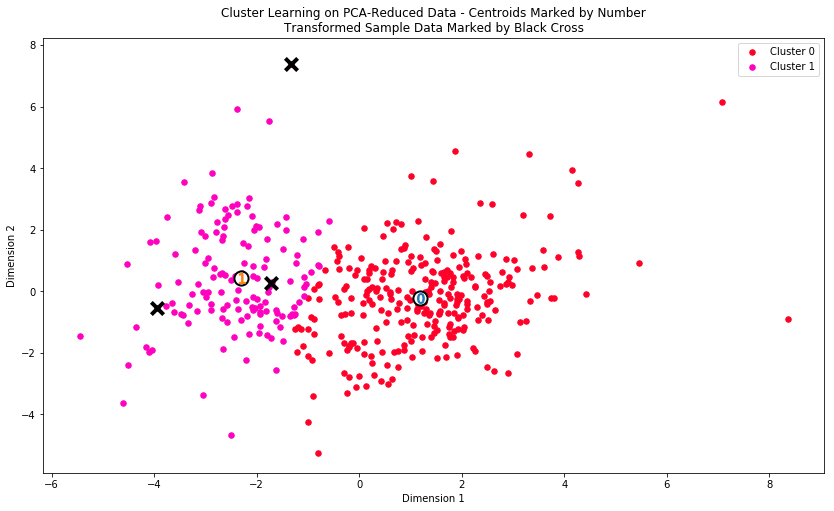

In [573]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [719]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

total_expense_0 = true_centers.loc['Segment 0'].sum()
total_expense_1 = true_centers.loc['Segment 1'].sum()

print('The total average expense of segment 0 for all categories is: {}'.format(total_expense_0))
print('The total average expense of segment 1 for all categories is: {}'.format(total_expense_1))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8909.0,2163.0,2716.0,2097.0,388.0,753.0
Segment 1,3799.0,8148.0,13315.0,885.0,5164.0,1072.0


The total average expense of segment 0 for all categories is: 17026.0
The total average expense of segment 1 for all categories is: 32383.0


Text(0,0.5,'Average Expense')

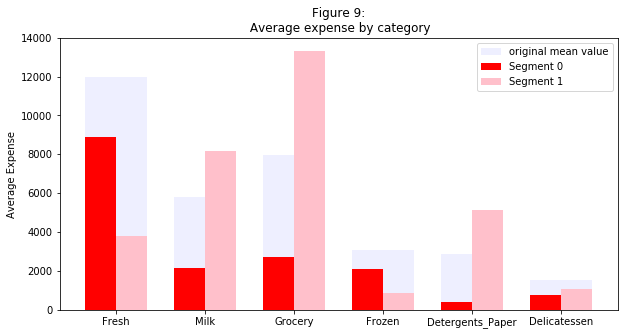

<Figure size 720x1440 with 0 Axes>

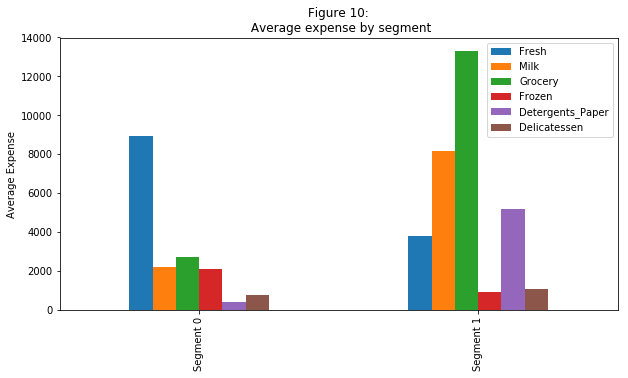

In [730]:
# Figue 1
fig, ax = plt.subplots(figsize=(10,5))

ind = np.arange(len(true_centers.columns.values))
width = 0.35

plt.bar(x=ind, height=data.describe().loc['mean'], width=width*2, label='original mean value', color='#eeefff')
plt.bar(x=ind - width/2, height=true_centers.loc['Segment 0'], width=width, label='Segment 0', color='red')
plt.bar(x=ind + width/2, height=true_centers.loc['Segment 1'], width=width, label='Segment 1', color='pink')
plt.figure(figsize=(10,20))

ax.set_ylabel('Average Expense')
ax.set_xticklabels(true_centers.columns.values)
ax.set_xticks(ind)
ax.legend()
ax.set_title('Figure 9:\n Average expense by category')

# Figure 2
ax = true_centers.plot.bar(figsize=(10,5), title="Figure 10:\n Average expense by segment")
ax.set_ylabel('Average Expense')

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

**Segment 0**: This segment seems to spend a lot less in all categories compared with segment 1, with a total average of 17026, compared with 32383 of segment 2, which is almost double as much.This suggests that customers from segment 0 are smaller businesses than customers from segment 2. 

The second thing we can see is how much this segment spends on fresh compared to all the other categories, almost 4 times as much than the second most spended category with is Grocery. All of this expense on fresh food suggests that these customers could be restaurants, or fresh food markets where there is a high turnover for these products.

Finally we see how the next three most relevant products are Grocery, Milk and Frozen respectively, wich are all food categories. If we compare them with the average expense on Detergents_Paper, which is really low, this supports the statememnt above that these stablishments will probably be restaurants of food markets.

The original mean values suggested that the most important category was Fresh, with the most expense average for all customers, however we can now see how it differs for our new found clusters.


**Segment 1**: This segment has almost twice as much total average expense than segment 0. This leads to think that they are bigger stablishments, maybe chains, as they have a much bigger budget.

The next thing we see for this segment is the amount of expense on Grocery compared to all the other categories is much bigger. The next categories that follow are Milk, Detergents_Paper and Fresh respectively. These are the kind of categories that can be found in a super market, where the biggest range of products can be considered groceries, folowed by Milk, as it is a basic product almost everyone consumes, having a fast turnover caused by high demand, therefore having to spend a lot to make sure there is always milk to sell. Other things that are important for supermarkets to have are fresh food and house supplies (detergents_paper), however these products have a smaller turnover, as they are not necessary as often (detergents_paper), or they are more expensive than other available options (fresh).

The original mean values suggested that grocery wasn't as important as other categories, however now we can see that for this segment it is the most important category by far.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [729]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

All the samples that I had chosen have been predicted to be in *cluster 1*. This is somewhat consistent as we can see that the categories with the most expense in the samples follow a similar pattern compared to the main categories for *cluster 1*. 

There are some differences in other categories, such as *sample point 0* having Fresh as its main category, however all its other categories fall near the average expense for *cluster 1*.

An interesting point to observe is *sample point 1*, which was one of the points considered an outlier in the data pre-processing process, however it was kept, as it showed correlation with some other features. It is interesting to see that even though its values are much lower than the average, it stills follows a similar pattern by watching the categories with the most expense. For example, groceries is the most important for this sample point, followed by detergents and Milk, which kind of follows the same expenses pattern as the *segment 1*.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

**Note:** For this answer I will make an assumption that most of the complaints that happened when changing the delivery service from 5 days to 3 days were because some customers might need daily deliveries.

I think it is quite clear which customers might want daily deliveries, and which customers might be okay with 3 days a week deliveries by looking at figure 10. As we found out before by comparing both segments, *segment 0*'s main expening category was *Fresh*. We can make two assumptions from this data: first, fresh food needs to have a fast turnover, as it goes bad really quickly; second, it is their main category so it is the category with the most demand for their business. From those two assumptions we can conclude that these types of customers might need daily deliveries, since they can't buy really big amounts to store (otherwise it will go bad), and demand for those products is high for them. Therefore these customers might not be happy about the 3 day delivery scheme, as the deliveries won't be as often as they need them to.

In the other hand, *segment 1* has a high demand for *Grocery*, which has a longer life span than *fresh*, therefore they are able to buy more quantities at a time having less restrictions about the products going bad. Hence this customer segment might not be too bothered by the 3 day delivery change. The second most important product for this segment is *milk*, which doesn't have a very long life span (assuming it is fresh milk and not long-lasting milk), however it does have a longer life span than most fresh products, which means the clients might be comfortable with the 3 day delivery service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can assign these new **customer segment** labels to each customer, and train a supervised model having as a target data (prediction) the customer segment they belong to. The model will learn the features that make a customer belong to one segment or the other. Finally we can give our model new data, such as the new client estimates, and it will be able to predict to what segment each of these clients belong to based on the similarities of their data to the segment's data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

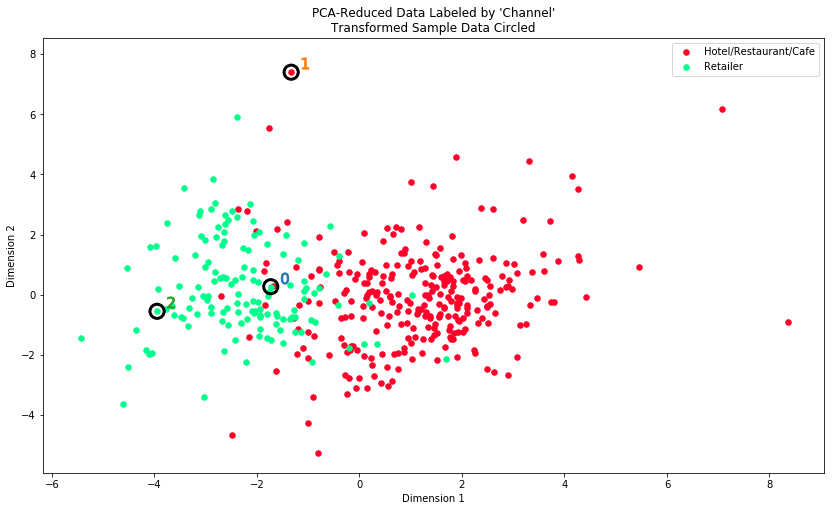

In [731]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* This new information explains perfectly the average spending categories from the clusters we have discovered so far. Retailers being very similar to cluster 1, having groceries as their main spending prodct, and Restaurants/hotels/cafes being cluster 0, having fresh as their main spending product. All of this just proves that all the information extracted from the clustering process was helpful when making assumptions about each customer.

* The new separation of the data shows how similar the clusters are from the *channel* labels. Therefore we can assume that one of the segments (segment 0) are purely `HoReCa`, and the other semgent (segment 1) are purely `Retailers`. However it will be expected a small margin of error for some misclassified data points.

* Yes, as mentioned in the first bullet, this new separation of the data just proves how meaningful and helpful the information extracted from each segment was.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.